# White_Wine_Quality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math
import pickle


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,
                            ConfusionMatrixDisplay,accuracy_score,f1_score,
                            mean_squared_error, mean_absolute_error, max_error,
                            r2_score, explained_variance_score)

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF,WhiteKernel,DotProduct
from sklearn.neural_network import MLPRegressor

## Loading Data

In [2]:
Dataset = pd.read_csv('Regression_Datasets/1_Wine_Quality/Wine_Quality_White.csv', delimiter=';') 
Dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Prepration And Analysis

In [3]:
print(np.count_nonzero(Dataset==np.nan))
print(np.count_nonzero(Dataset=="?"))
Dataset.isnull().sum()

0
0


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [59]:
Dataset.apply(lambda x: len(x.unique()))

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

<AxesSubplot:>

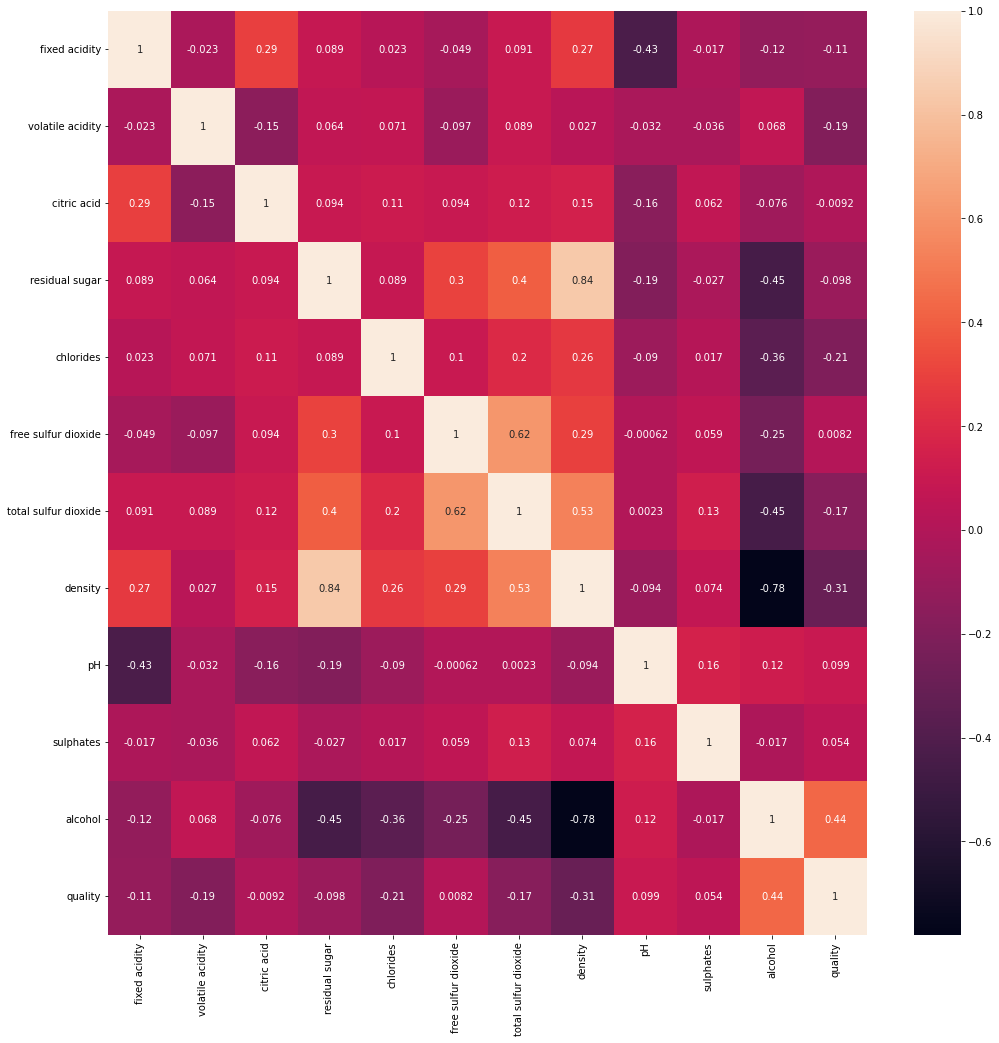

In [6]:
plt.figure(figsize=(17,17))
sns.heatmap(Dataset.corr(), annot =True )

In [60]:
Dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

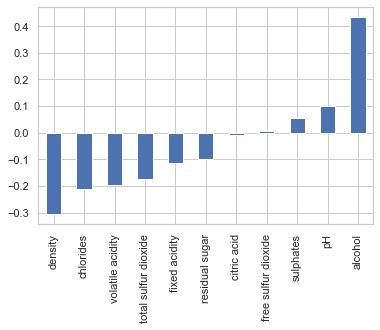

In [61]:
cor = Dataset.corr()['quality'][:-1].sort_values()
cor.plot(kind="bar")

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64
---------------------------


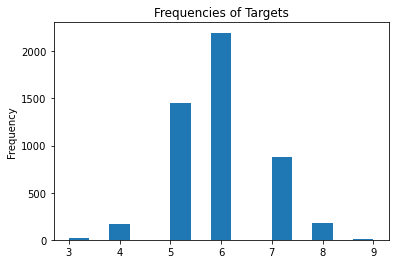

In [7]:
frequency = Dataset['quality'].value_counts()
print(frequency)
print("---------------------------")
plt.title('Frequencies of Targets')
Dataset['quality'].plot.hist(subplots=True, figsize=(20, 30), bins=15);

### Defining Dictionary Of Models

In [8]:
# MODELS = {'linear_r', 'svr', 'decision_tree_r', 'random_forest_r', 'knn_r', 'adaboost_r', 'gaussian_process_r', 'neural_network_r'}
MODELS = {'linear_r', 'svr', 'decision_tree_r', 'random_forest_r','knn_r', "adaboost", "GaussianProcessRegressor", "nn_r"}
white_wine_dict = {}    

## Train and Test set

In [9]:
X = Dataset.iloc[:,:-1]
y = Dataset.iloc[:, -1:]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=0)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [11]:
StScale = StandardScaler()
StScale.fit(X_train)
X_train = StScale.transform(X_train)

X_test = StScale.transform(X_test)

In [46]:
from tabulate import tabulate
def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']
    
    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])
    
    linear_r_predict = curr_model.predict(X_test)
    
    rmse = np.sqrt( mean_squared_error(y_test, linear_r_predict))
    model['rmse'] = rmse
    mse = mean_squared_error(y_test, linear_r_predict)
    model['mse'] = mse
    r2 = r2_score(y_test, linear_r_predict)
    model['r2'] = r2
    
    linear_r_predict_trn = curr_model.predict(X_train)
    mse_trn = mean_squared_error(y_train, linear_r_predict_trn)
    model['mse_trn'] = mse_trn
    r2_trn = r2_score(y_train, linear_r_predict_trn)
    model['r2_trn'] = r2_trn
    
    table.append(['Root Mean Squarred Error', rmse])
    table.append(['Mean Squarred Error', mse])
    table.append(['r2 Score ',r2])
    table.append(['Mean Squarred Error (train)', mse_trn])
    table.append(['r2 Score (train)',r2_trn])
    
    print(tabulate(table, headers='firstrow', tablefmt='grid'))

## Linear Regression

In [47]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

white_wine_dict['linear_r'] = {'model':linear_r, 'hyperparameters':0}

## Linear Regression Analysis

In [48]:
model_results(white_wine_dict['linear_r'])

+-----------------------------+----------+
| Parameters / Metrics        |    Tuned |
+=============================+==========+
| Root Mean Squarred Error    | 0.813955 |
+-----------------------------+----------+
| Mean Squarred Error         | 0.662523 |
+-----------------------------+----------+
| r2 Score                    | 0.263123 |
+-----------------------------+----------+
| Mean Squarred Error (train) | 0.546927 |
+-----------------------------+----------+
| r2 Score (train)            | 0.283908 |
+-----------------------------+----------+


## Support Vector Regression

In [15]:
svr = SVR().fit(X_train, y_train)

In [16]:
parameters = {
    'C': scipy.stats.uniform(1, 10), 
    'gamma': scipy.stats.uniform(0.001, 1)
}
svr_model = RandomizedSearchCV(svr, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
svr_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 2.182744258689332, 'gamma': 0.6409210213275238}

In [17]:
svr_model.best_estimator_

SVR(C=2.182744258689332, gamma=0.6409210213275238)

## Support Vector Regression Analysis

In [49]:
white_wine_dict['svr'] = {'model':svr_model, 'hyperparameters':1}
model_results(white_wine_dict['svr'])

+-----------------------------+-----------+
| Parameters / Metrics        |     Tuned |
+=============================+===========+
| C                           | 2.18274   |
+-----------------------------+-----------+
| gamma                       | 0.640921  |
+-----------------------------+-----------+
| Root Mean Squarred Error    | 0.703864  |
+-----------------------------+-----------+
| Mean Squarred Error         | 0.495425  |
+-----------------------------+-----------+
| r2 Score                    | 0.448974  |
+-----------------------------+-----------+
| Mean Squarred Error (train) | 0.0472239 |
+-----------------------------+-----------+
| r2 Score (train)            | 0.93817   |
+-----------------------------+-----------+


## Decision Tree Regression

In [19]:
tree = DecisionTreeRegressor().fit(X_train, y_train)

In [20]:
parameters = {
    'max_depth': scipy.stats.uniform(1, 50),
    'min_samples_split': scipy.stats.uniform(0, 1) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=25, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'max_depth': 35.88155979636324, 'min_samples_split': 0.06022547162926983}

## Decision tree Analysis

In [50]:
white_wine_dict['decision_tree_r'] = {'model':tree_model, 'hyperparameters':1}
model_results(white_wine_dict['decision_tree_r'])

+-----------------------------+------------+
| Parameters / Metrics        |      Tuned |
+=============================+============+
| max_depth                   | 35.8816    |
+-----------------------------+------------+
| min_samples_split           |  0.0602255 |
+-----------------------------+------------+
| Root Mean Squarred Error    |  0.814476  |
+-----------------------------+------------+
| Mean Squarred Error         |  0.663371  |
+-----------------------------+------------+
| r2 Score                    |  0.26218   |
+-----------------------------+------------+
| Mean Squarred Error (train) |  0.473119  |
+-----------------------------+------------+
| r2 Score (train)            |  0.380545  |
+-----------------------------+------------+


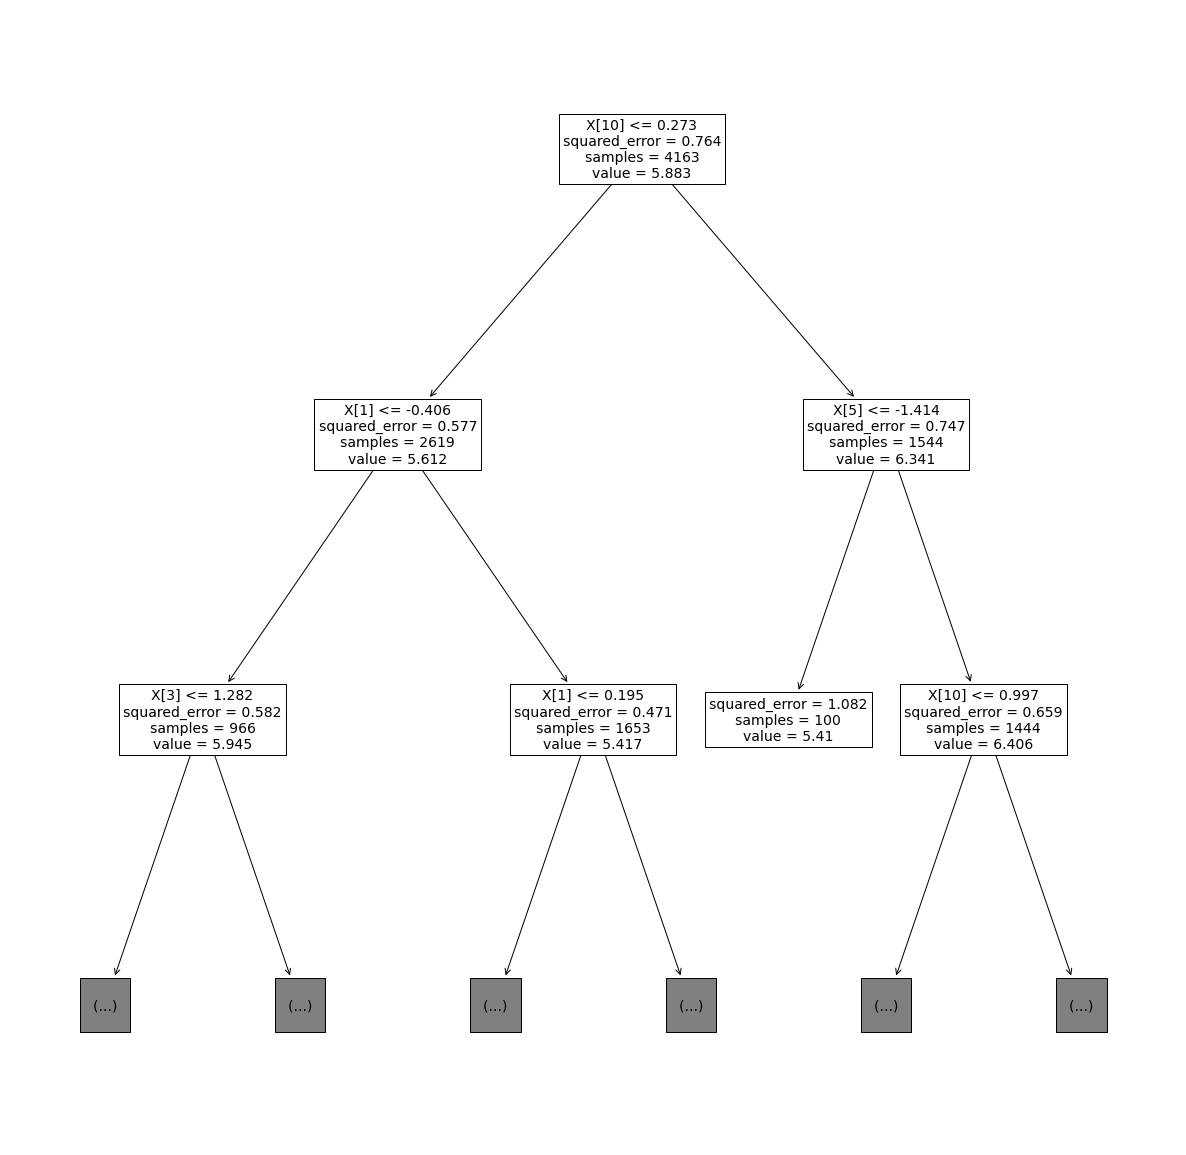

In [22]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest Regression

In [23]:
forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)

In [24]:
parameters = {
    'n_estimators': range(100,150),
    'max_depth': scipy.stats.uniform(1, 100),
}
forest_model = RandomizedSearchCV(forest, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
forest_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 30.753460654447228, 'n_estimators': 124}

## Random Forest Analysis

In [51]:
white_wine_dict['random_forest_r'] = {'model':forest_model, 'hyperparameters':1}
model_results(white_wine_dict['random_forest_r'])

+-----------------------------+------------+
| Parameters / Metrics        |      Tuned |
+=============================+============+
| max_depth                   |  30.7535   |
+-----------------------------+------------+
| n_estimators                | 124        |
+-----------------------------+------------+
| Root Mean Squarred Error    |   0.670979 |
+-----------------------------+------------+
| Mean Squarred Error         |   0.450213 |
+-----------------------------+------------+
| r2 Score                    |   0.499261 |
+-----------------------------+------------+
| Mean Squarred Error (train) |   0.048403 |
+-----------------------------+------------+
| r2 Score (train)            |   0.936626 |
+-----------------------------+------------+


## K Nearest Neighbours Regression

In [26]:
knn =  KNeighborsRegressor()

In [27]:
parameters = {
    'n_neighbors': range(1, 100), 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'weights': ['uniform', 'distance'], 
    'leaf_size': scipy.stats.uniform(1, 50)
}
knn_model = RandomizedSearchCV(knn, parameters,verbose=1,random_state=0,n_iter=100, cv =10).fit(X_train, y_train)
knn_model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'algorithm': 'auto',
 'leaf_size': 12.89464106872543,
 'n_neighbors': 26,
 'weights': 'distance'}

### KNN Analysis

In [52]:
white_wine_dict['knn_r'] = {'model':knn_model, 'hyperparameters':1}
model_results(white_wine_dict['knn_r'])

+-----------------------------+---------------------+
| Parameters / Metrics        | Tuned               |
+=============================+=====================+
| algorithm                   | auto                |
+-----------------------------+---------------------+
| leaf_size                   | 12.89464106872543   |
+-----------------------------+---------------------+
| n_neighbors                 | 26                  |
+-----------------------------+---------------------+
| weights                     | distance            |
+-----------------------------+---------------------+
| Root Mean Squarred Error    | 0.6822809520353426  |
+-----------------------------+---------------------+
| Mean Squarred Error         | 0.46550729751025344 |
+-----------------------------+---------------------+
| r2 Score                    | 0.4822494723284142  |
+-----------------------------+---------------------+
| Mean Squarred Error (train) | 0.0                 |
+---------------------------

## Adaboost

In [29]:
AdaBoost = AdaBoostRegressor()
AdaBoost.fit(X_train,y_train)

AdaBoostRegressor()

In [30]:
param_distribution = {'learning_rate':scipy.stats.uniform(0.01,5),
                'n_estimators': range(1,250),
                'loss' : ['linear', 'square', 'exponential']}

In [31]:
adaBoost_model = RandomizedSearchCV(AdaBoost,
                                         param_distribution ,
                                         verbose=1, random_state=0,
                                         cv=5, n_iter=100).fit(X_train,y_train)


adaBoost_model.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'learning_rate': 0.42556246315301194,
 'loss': 'exponential',
 'n_estimators': 44}

### Adaboost Analysis

In [53]:
white_wine_dict['adaboost'] = {'model':adaBoost_model, 'hyperparameters':1}
model_results(white_wine_dict['adaboost'])

+-----------------------------+---------------------+
| Parameters / Metrics        | Tuned               |
+=============================+=====================+
| learning_rate               | 0.42556246315301194 |
+-----------------------------+---------------------+
| loss                        | exponential         |
+-----------------------------+---------------------+
| n_estimators                | 44                  |
+-----------------------------+---------------------+
| Root Mean Squarred Error    | 0.7879264108393312  |
+-----------------------------+---------------------+
| Mean Squarred Error         | 0.6208280288981506  |
+-----------------------------+---------------------+
| r2 Score                    | 0.3094973134159126  |
+-----------------------------+---------------------+
| Mean Squarred Error (train) | 0.4995186029184717  |
+-----------------------------+---------------------+
| r2 Score (train)            | 0.34598004952497474 |
+---------------------------

## GaussianProcessRegressor

In [33]:
GPR = GaussianProcessRegressor(kernel = 1.0 * RBF(1.0), normalize_y = False)

In [34]:
param_distribution = {"alpha":scipy.stats.reciprocal(1e-11, 1e-8),
                      'kernel':[Matern(i) for i in [0, 0.2, 0.5, 1,2,3,5]]  +
                      [RBF(i) for i in [0, 0.2, 0.5, 1,2,3,5]]+[DotProduct(i) for i in [0, 0.2, 0.5, 1,2,3,5]] +[WhiteKernel(i) for i in [0.2, 0.5, 1,2,3,5]] }


In [35]:
GPR_model = RandomizedSearchCV(GPR, param_distribution, cv=5, n_iter=20 ,random_state=0,verbose=1)
GPR_model.fit(X_train, y_train)
GPR_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:285: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:285: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
C:\Users\Asus\a

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:285: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:285: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\gaussian_process\k

{'alpha': 2.6352640400187257e-10, 'kernel': DotProduct(sigma_0=1)}

### GaussianProcessRegressor analysis

In [54]:
white_wine_dict['GaussianProcessRegressor'] = {'model':GPR_model, 'hyperparameters':1}
model_results(white_wine_dict['GaussianProcessRegressor'])

+-----------------------------+------------------------+
| Parameters / Metrics        | Tuned                  |
+=============================+========================+
| alpha                       | 2.6352640400187257e-10 |
+-----------------------------+------------------------+
| kernel                      | DotProduct(sigma_0=1)  |
+-----------------------------+------------------------+
| Root Mean Squarred Error    | 0.813927413040973      |
+-----------------------------+------------------------+
| Mean Squarred Error         | 0.6624778336995708     |
+-----------------------------+------------------------+
| r2 Score                    | 0.26317320952175427    |
+-----------------------------+------------------------+
| Mean Squarred Error (train) | 0.5469163830619732     |
+-----------------------------+------------------------+
| r2 Score (train)            | 0.28392211286162594    |
+-----------------------------+------------------------+


## neural_network_regression (MLPRegressor)

In [37]:
nn_r = MLPRegressor()

In [38]:
param_distribution ={'max_iter': range(1000, 1500),
                     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                     'learning_rate':['constant', 'invscaling', 'adaptive'],
                     'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                    'solver':["adam",'sgd'],
                    'activation':["identity",'tanh', "relu", "logistic"]   
}

In [39]:
nnr_model = RandomizedSearchCV(nn_r,
                                         param_distribution ,
                                         verbose=1, random_state=0,
                                         cv=5,n_jobs=5, n_iter=100).fit(X_train,y_train)


nnr_model.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1058) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1058) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1058) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1058) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multil

{'activation': 'relu',
 'alpha': 0.0044906872742500395,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'max_iter': 1094,
 'solver': 'adam'}

### neural_network_regression analysis

In [55]:
white_wine_dict['nn_r'] = {'model':nnr_model, 'hyperparameters':1}
model_results(white_wine_dict['nn_r'])

+-----------------------------+-----------------------+
| Parameters / Metrics        | Tuned                 |
+=============================+=======================+
| activation                  | relu                  |
+-----------------------------+-----------------------+
| alpha                       | 0.0044906872742500395 |
+-----------------------------+-----------------------+
| hidden_layer_sizes          | (100,)                |
+-----------------------------+-----------------------+
| learning_rate               | constant              |
+-----------------------------+-----------------------+
| max_iter                    | 1094                  |
+-----------------------------+-----------------------+
| solver                      | adam                  |
+-----------------------------+-----------------------+
| Root Mean Squarred Error    | 0.7180555060058054    |
+-----------------------------+-----------------------+
| Mean Squarred Error         | 0.51560370970525

-------------------------


### Analyzing Models for Red Wine Quality

+--------------------------+----------+------------+---------------+--------------------+----------+
| Model Name               |      MSE |   r2 Score |   MSE (train) |   r2 Score (train) |     RMSE |
+==========================+==========+============+===============+====================+==========+
| random_forest_r          | 0.450213 |   0.499261 |     0.048403  |           0.936626 | 0.670979 |
+--------------------------+----------+------------+---------------+--------------------+----------+
| svr                      | 0.495425 |   0.448974 |     0.0472239 |           0.93817  | 0.703864 |
+--------------------------+----------+------------+---------------+--------------------+----------+
| adaboost                 | 0.620828 |   0.309497 |     0.499519  |           0.34598  | 0.787926 |
+--------------------------+----------+------------+---------------+--------------------+----------+
| GaussianProcessRegressor | 0.662478 |   0.263173 |     0.546916  |           0.283922 | 0

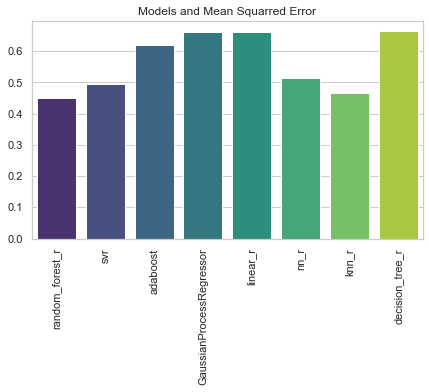

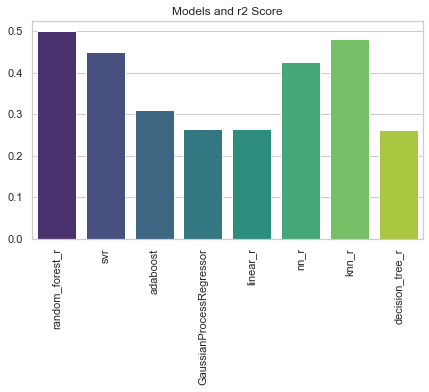

In [62]:
def cross_checking_model_results(dictionary):
    table = [["Model Name", "MSE", "r2 Score","MSE (train)", "r2 Score (train)" , "RMSE"]]
    x_models = []
    y_mse = []
    y_r2 = []
    y_mse_trn = []
    y_r2_trn = []
    y_rmse = []
    
    for model_key in MODELS:
        table.append([model_key, dictionary[model_key]['mse'], dictionary[model_key]['r2'],
                                 dictionary[model_key]['mse_trn'], dictionary[model_key]['r2_trn'],
                                                         dictionary[model_key]['rmse']            ])
        x_models.append(model_key)
        y_mse.append(dictionary[model_key]['mse'])
        y_r2.append(dictionary[model_key]['r2'])
        y_mse_trn.append(dictionary[model_key]['mse_trn'])
        y_r2_trn.append(dictionary[model_key]['r2_trn'])
        y_rmse.append(dictionary[model_key]['rmse'])
    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(7,4))
    ax1 = sns.barplot(x=x_models, y=y_mse, palette="viridis")
    ax1.set_title('Models and Mean Squarred Error')
    ax1.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=y_r2, palette="viridis")
    ax2.set_title('Models and r2 Score')
    ax2.set_xticklabels(labels=x_models, rotation=90)


cross_checking_model_results(white_wine_dict)

### Regression Dictionary
Exporting Model Data for Later Analysis and Comparison

In [57]:
with open('base_regression_dict.dictionary', 'rb') as config_dictionary_file:
    base_regression_dict = pickle.load(config_dictionary_file)

base_regression_dict['white_wine_quality']= white_wine_dict

with open('base_regression_dict.dictionary', 'wb') as config_dictionary_file:
    pickle.dump(base_regression_dict, config_dictionary_file)